1 a

In [31]:
import numpy as np
import a2_utils as utils
import cv2
import matplotlib.pyplot as plt
import math
import random
from PIL import Image
import os

In [72]:
print(np.convolve((0,1,1,1,0,0.7,0.5,0.2,0,0,1,0), (0.5,1,0.3)))

[0.   0.5  1.5  1.8  1.3  0.65 0.95 0.81 0.35 0.06 0.5  1.   0.3  0.  ]


1 b

In [16]:
def simple_convolution(I,k):  
    N = int((len(k)-1)/2)   #dobi N iz k 
    result = np.zeros(len(I))
    j = 0
    for i in range(N,len(I)-N-1):   #gre od i = N do i = |I|−N −1
        #print(I[i-N:i+N+1]) 
        #print(k)
        result[j] = np.sum(I[i-N:i+N+1]*k)
        j += 1
    return result

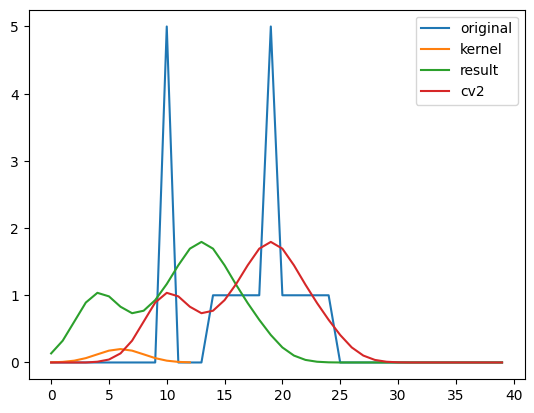

0.9999999974


In [17]:
#prebermo podatke
I = utils.read_data('signal.txt')
k = utils.read_data('kernel.txt')

#izracuni
result = simple_convolution(I,k)
result_cv2 = cv2.filter2D(I,-1,k)

#plot
plt.plot(I, label = 'original')
plt.plot(k, label = 'kernel')
plt.plot(result, label = 'result')
plt.plot(result_cv2, label = 'cv2')
plt.legend()
plt.show()

#question
#Gaussian kernel , za smoothanje signala, vsota je: 1
sum = np.sum(k)
print(sum)

1 c

In [18]:
def convolution(I,k):
    N = int((len(k) - 1) / 2)
    result = np.zeros(len(I))
    I_padded = np.pad(I, (N, N), 'constant')
    j = 0

    for i in range(N, len(I) + N):  
        result[j] = np.sum(I_padded[i - N:i + N + 1] * k)
        j += 1

    return result

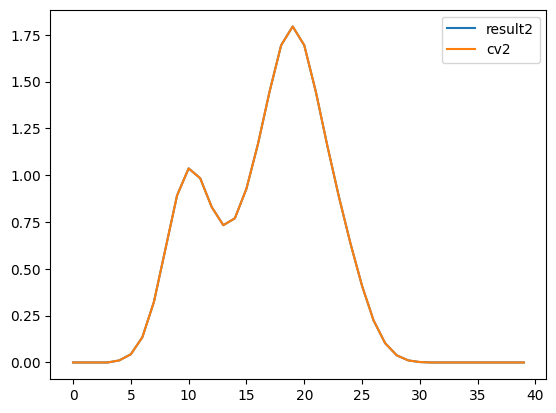

In [19]:
result2 = convolution(I,k)
plt.plot(result2, label = 'result2')
plt.plot(result_cv2, label = 'cv2')
plt.legend()
plt.show()


1 d

In [20]:
def gauss(sigma):
    N = int(2* np.ceil(3*sigma) + 1)    #velikost kernela
    x = np.linspace(-(N-1)/2, (N-1)/2, N)    #N tock, N-1 je tm k mors 0 upostevat
    g = np.exp(-(x**2) / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi)) #gauss formula
    return x, g


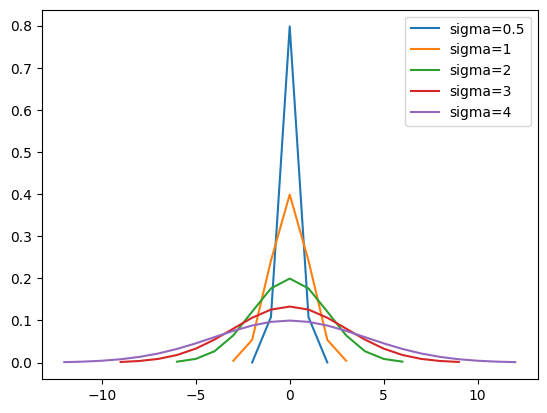

In [21]:
sigma = [0.5, 1, 2, 3, 4]
for s in sigma:
    x, y = gauss(s)
    plt.plot(x, y, label=f'sigma={s}')
plt.legend()
plt.show()

1 e

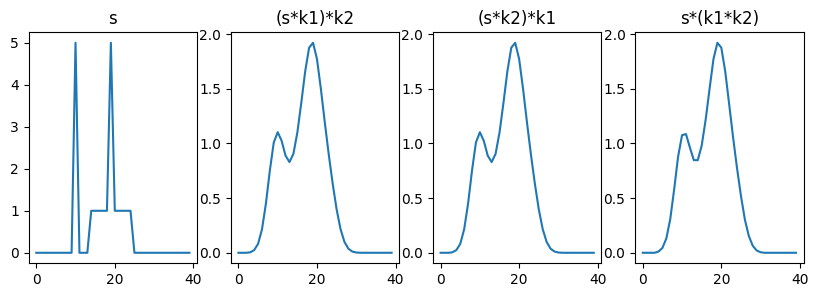

In [23]:
#subplot size
plt.figure(figsize=(10,3))

s = utils.read_data('signal.txt')
plt.subplot(1,4,1)
plt.plot(s)
plt.title("s")

_, k1 = gauss(2)
k2 = np.array([0.1,0.6,0.4])

s_k1 = convolution(s,k1)
s_k1_k2 = convolution(s_k1,k2)
plt.subplot(1,4,2)
plt.plot(s_k1_k2)
plt.title("(s*k1)*k2")

s_k2 = convolution(s,k2)
s_k2_k1 = convolution(s_k2,  k1)
plt.subplot(1,4,3)
plt.plot(s_k2_k1)
plt.title("(s*k2)*k1")

k3 = convolution(k1,k2)
s_k3 = convolution(s, k3)
plt.subplot(1,4,4)
plt.plot(s_k3)
plt.title("s*(k1*k2)")

plt.show()


2 a

In [43]:
def gaussfilter(image,sigma):
    _, kernel = gauss(sigma)

    filtered_img = cv2.filter2D(image,-1,kernel)
    filtered_img = cv2.filter2D(filtered_img,-1,kernel.T)
    return filtered_img
    

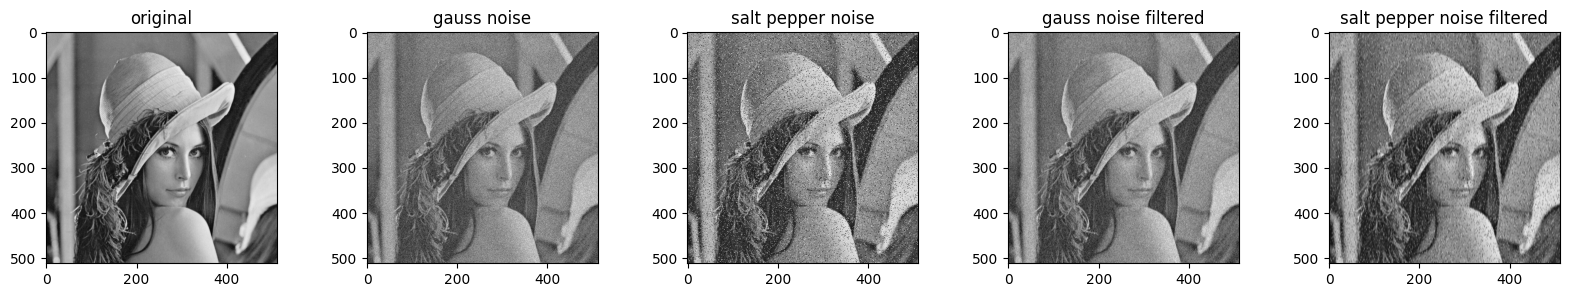

In [48]:
plt.figure(figsize=(20,3))

lena = cv2.imread('images/lena.png', cv2.IMREAD_GRAYSCALE) / 255
plt.subplot(1,5,1)
plt.imshow(lena, cmap='gray')
plt.title("original")

lenaGausNoise = utils.gauss_noise(lena)
plt.subplot(1,5,2)
plt.imshow(lenaGausNoise, cmap='gray')
plt.title("gauss noise")

lenaSaltPepperNoise = utils.sp_noise(lena)
plt.subplot(1,5,3)
plt.imshow(lenaSaltPepperNoise, cmap='gray')
plt.title("salt pepper noise")

lenaGausNoiseFiltered = gaussfilter(lenaGausNoise, 0.5)
plt.subplot(1,5,4)
plt.imshow(lenaGausNoiseFiltered, cmap='gray')
plt.title("gauss noise filtered")

lenaSaltPepperNoiseFiltered = gaussfilter(lenaSaltPepperNoise, 1)
plt.subplot(1,5,5)
plt.imshow(lenaSaltPepperNoiseFiltered, cmap='gray')
plt.title("salt pepper noise filtered")

plt.show()


2 b

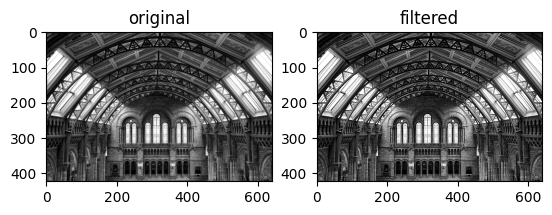

In [75]:
museum = cv2.imread('images/museum.jpg', cv2.IMREAD_GRAYSCALE) / 255

kernel1 = np.array([[0,0,0],[0,2,0],[0,0,0]])
kernel2 = np.array([[1,1,1],[1,1,1],[1,1,1]]) * 1/9

kernel = kernel1 - kernel2

museumFiltered = cv2.filter2D(museum,-1,kernel)

plt.subplot(1,2,1)
plt.imshow(museum, cmap='gray')
plt.title("original")

plt.subplot(1,2,2)
plt.imshow(museumFiltered, cmap='gray', vmin=0, vmax=1)
plt.title("filtered")

plt.show()

2 c

In [187]:
def simple_median(I,w):
    N = int((w-1)/2)
    result = np.zeros(len(I))
    I_padded = np.pad(I, (N, N), 'constant')
    j = 0

    for i in range(N, len(I) + N):  
        result[j] = np.median(I_padded[i - N:i + N])
        j += 1

    return result
    

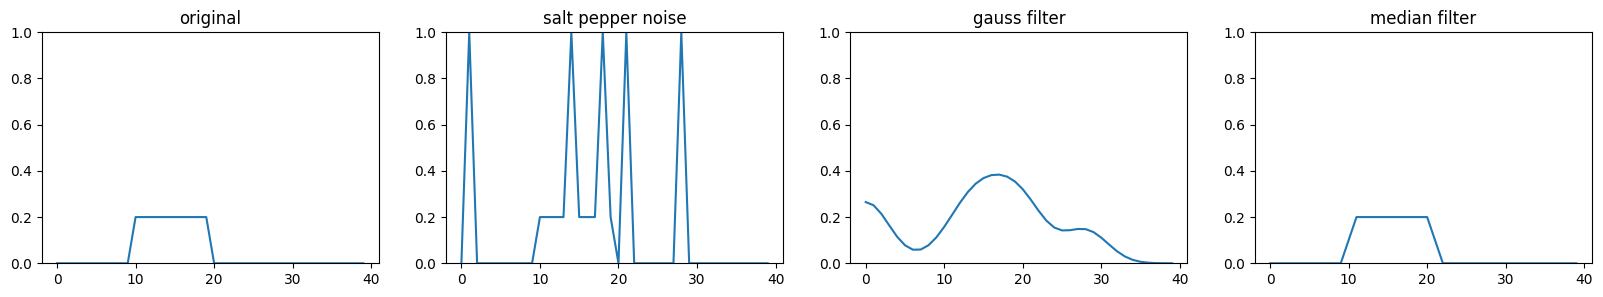

In [192]:
simpleSignal = np.array([0,0,0,0,0,0,0,0,0,0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

#salt and pepper noise
simpleSignalSP = simpleSignal.copy()
for i in range(0, len(simpleSignalSP)):
    random.seed(i)
    rand = random.random()
    #print(rand)
    if rand < 0.1:
        simpleSignalSP[i] = 0
    elif rand < 0.2:
        simpleSignalSP[i] = 1

#gausfillter
simpleSignalGauss = gaussfilter(simpleSignalSP, 2)

#median filter
simpleSignalMedian = simple_median(simpleSignalSP, 7)

plt.figure(figsize=(20,3))

plt.subplot(1,4,1)
plt.plot(simpleSignal)
plt.ylim(0, 1)
plt.title("original")

plt.subplot(1,4,2)
plt.plot(simpleSignalSP)
plt.ylim(0, 1)
plt.title("salt pepper noise")

plt.subplot(1,4,3)
plt.plot(simpleSignalGauss)
plt.ylim(0, 1)
plt.title("gauss filter")

plt.subplot(1,4,4)
plt.plot(simpleSignalMedian)
plt.ylim(0, 1)
plt.title("median filter")

plt.show()

2 d

In [193]:
def median2D(I,w):
    N = int((w-1)/2)
    result = np.zeros((len(I), len(I[0])))
    I_padded = np.pad(I, (N, N), 'constant')
    

    for i in range(N, len(I) + N):  
        for j in range(N, len(I[0]) + N):
            result[i-N][j-N] = np.median(I_padded[i - N:i + N, j - N:j + N])
   

    return result

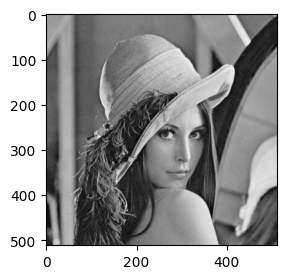

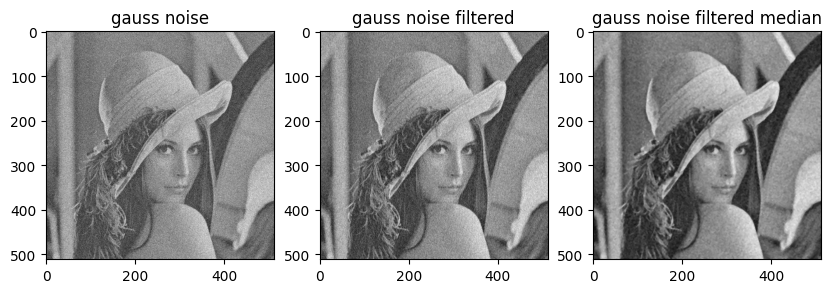

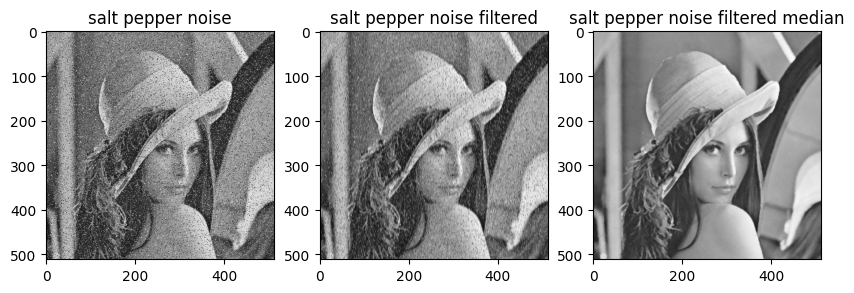

In [211]:
lena = cv2.imread('images/lena.png', cv2.IMREAD_GRAYSCALE) / 255

plt.figure(figsize=(20,3))
plt.imshow(lena, cmap='gray')

#gauss noise
lenaGaussNoise = utils.gauss_noise(lena)
lenaGaussNoiseFiltered = gaussfilter(lenaGaussNoise, 0.5)
lenaGaussNoiseFilteredMedian = median2D(lenaGaussNoise, 5)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(lenaGaussNoise, cmap='gray')
plt.title("gauss noise")

plt.subplot(1,3,2)
plt.imshow(lenaGaussNoiseFiltered, cmap='gray')
plt.title("gauss noise filtered")

plt.subplot(1,3,3)
plt.imshow(lenaGaussNoiseFilteredMedian, cmap='gray')
plt.title("gauss noise filtered median")

plt.show()

#salt pepper noise
lenaSP = utils.sp_noise(lena)
lenaSPFiltered = gaussfilter(lenaSP, 1)
lenaSPFilteredMedian = median2D(lenaSP, 5)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(lenaSP, cmap='gray')
plt.title("salt pepper noise")

plt.subplot(1,3,2)
plt.imshow(lenaSPFiltered, cmap='gray')
plt.title("salt pepper noise filtered")

plt.subplot(1,3,3)
plt.imshow(lenaSPFilteredMedian, cmap='gray')
plt.title("salt pepper noise filtered median")

plt.show()

In [ ]:
#question
#gauss O(n^2*k^2) n dim slike, k dim kernela
#median O(n^2*k^2*log(k^2)) log(k^2) je za sortiranje

2 e

In [286]:
def laplacianFilter(I,sigma):
    N = int(2* np.ceil(3*sigma) + 1)    #velikost kernela2

    kernel1 = np.zeros((N,N))
    kernel1[int(N/2)][int(N/2)] = 1

    _,gaussian_kernel = gauss(sigma)
    kernel2 = np.outer(gaussian_kernel, gaussian_kernel)
    kernel2 = kernel2 / np.sum(kernel2)

    kernel = kernel1 - kernel2 
    
    filtered_img = cv2.filter2D(I,-1,kernel)
    return filtered_img

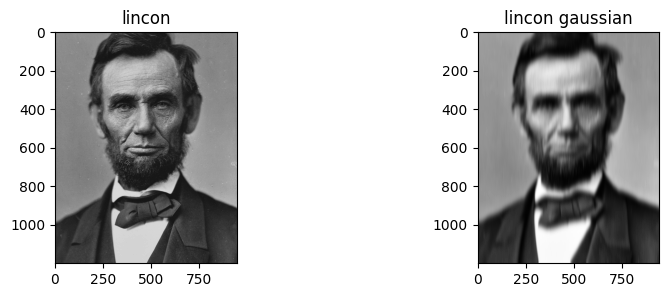

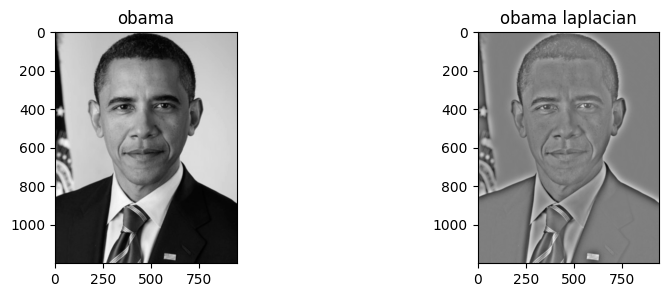

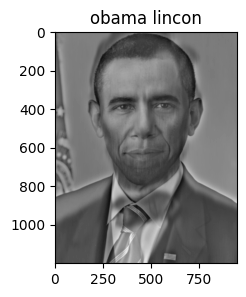

In [295]:
lincon = cv2.imread('images/lincoln.jpg', cv2.IMREAD_GRAYSCALE) / 255
linconGauss = gaussfilter(lincon, 10)

obama = cv2.imread('images/obama.jpg', cv2.IMREAD_GRAYSCALE) / 255
obamaLap = laplacianFilter(obama,20)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.imshow(lincon, cmap='gray')
plt.title("lincon")

plt.subplot(1,2,2)
plt.imshow(linconGauss, cmap='gray')
plt.title("lincon gaussian")

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.imshow(obama, cmap='gray')
plt.title("obama")

plt.subplot(1,2,2)
plt.imshow(obamaLap, cmap='gray')
plt.title("obama laplacian")

#add together
obamaLincon = obamaLap + linconGauss
plt.figure(figsize=(10,3))
plt.imshow(obamaLincon, cmap='gray')
plt.title("obama lincon")

plt.show()




3 a

In [3]:
def myhist3(image, n_bins):
    H = np.zeros((n_bins,n_bins,n_bins))
    for i in range(0, len(image)):
        for j in range(0, len(image[0])):

            index1 = int(image[i, j, 0] * (n_bins - 1))
            index2 = int(image[i, j, 1] * (n_bins - 1))
            index3 = int(image[i, j, 2] * (n_bins - 1))

            H[index1, index2, index3] += 1

    H /= np.sum(H)
    return H

3 b

In [29]:
def compare_histograms(H1,H2,metric):
    if H1.shape != H2.shape:
        return None

    if metric == "l2":
        l2 = np.sqrt(np.sum(np.square(H1 - H2)))
        return np.floor(l2*1000)/1000
    elif metric == "Chi-square":
        chi = np.sum(np.square(H1 - H2) / (H1 + H2 + 1e-10)) * 0.5
        return np.floor(chi*1000)/1000
    elif metric == "intersection":
        inter = 1 - np.sum(np.minimum(H1, H2))
        return np.floor(inter*1000)/1000
    elif metric == "hellinger":
        hell = np.sqrt(np.sum(np.square(np.sqrt(H1) - np.sqrt(H2)))*0.5)
        return np.floor(hell*1000)/1000

3 c

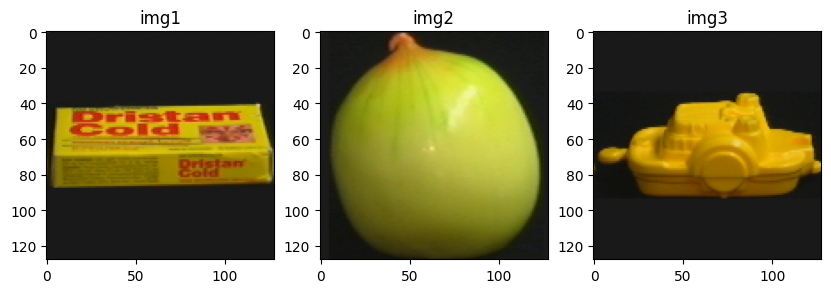

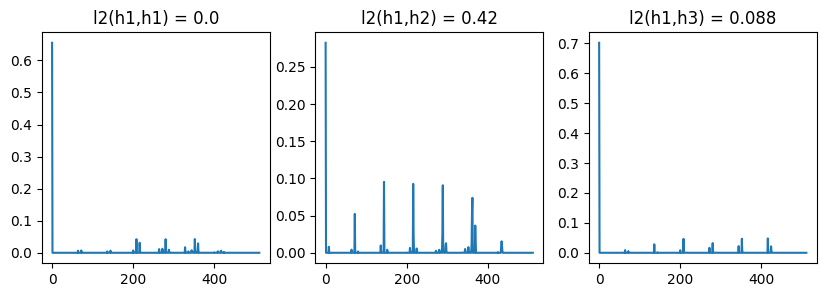

h1-h1: l2 = 0.0 Chi-square = 0.0 intersection = 0.0 hellinger = 0.0
h1-h2: l2 = 0.42 Chi-square = 0.415 intersection = 0.595 hellinger = 0.55
h1-h3: l2 = 0.088 Chi-square = 0.113 intersection = 0.166 hellinger = 0.298


In [30]:
img1 = np.asarray(Image.open("dataset/object_01_1.png").convert('RGB')).astype(np.float64) / 255
img2 = np.asarray(Image.open("dataset/object_02_1.png").convert('RGB')).astype(np.float64) / 255
img3 = np.asarray(Image.open("dataset/object_03_1.png").convert('RGB')).astype(np.float64) / 255

hist1 = myhist3(img1, 8)
hist2 = myhist3(img2, 8)
hist3 = myhist3(img3, 8)

hist1 = hist1.reshape(-1)
hist2 = hist2.reshape(-1)
hist3 = hist3.reshape(-1)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(img1)
plt.title("img1")

plt.subplot(1,3,2)
plt.imshow(img2)
plt.title("img2")

plt.subplot(1,3,3)
plt.imshow(img3)
plt.title("img3")

plt.show()

plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.plot(hist1)
plt.title("l2(h1,h1) = " + str(compare_histograms(hist1,hist1,"l2")))

plt.subplot(1,3,2)
plt.plot(hist2)
plt.title("l2(h1,h2) = " + str(compare_histograms(hist1,hist2,"l2")))

plt.subplot(1,3,3)
plt.plot(hist3)
plt.title("l2(h1,h3) = " + str(compare_histograms(hist1,hist3,"l2")))

plt.show()

print("h1-h1: " + "l2 = "+ str(compare_histograms(hist1,hist1,"l2")) + " Chi-square = "+ str(compare_histograms(hist1,hist1,"Chi-square")) + " intersection = "+ str(compare_histograms(hist1,hist1,"intersection")) + " hellinger = "+ str(compare_histograms(hist1,hist1,"hellinger")))
print("h1-h2: " + "l2 = "+ str(compare_histograms(hist1,hist2,"l2")) + " Chi-square = "+ str(compare_histograms(hist1,hist2,"Chi-square")) + " intersection = "+ str(compare_histograms(hist1,hist2,"intersection")) + " hellinger = "+ str(compare_histograms(hist1,hist2,"hellinger")))
print("h1-h3: " + "l2 = "+ str(compare_histograms(hist1,hist3,"l2")) + " Chi-square = "+ str(compare_histograms(hist1,hist3,"Chi-square")) + " intersection = "+ str(compare_histograms(hist1,hist3,"intersection")) + " hellinger = "+ str(compare_histograms(hist1,hist3,"hellinger")))

3 d

In [45]:
def getHistograms(directory, n_bins):
    image_histograms = {}
    for filename in os.listdir(directory):
        if filename.endswith('.png'):
            filepath = os.path.join(directory, filename)
            image = np.asarray(Image.open(filepath).convert('RGB')).astype(np.float64) / 255
            hist = myhist3(image, n_bins)
            image_histograms[filename] = hist.reshape(-1)

    return image_histograms

In [98]:
def getSimilarHist(image_dir,histograms,metric,directory):
    objects = []

    image =  np.asarray(Image.open(directory + "/"+image_dir).convert('RGB')).astype(np.float64) / 255
    image_histogram = myhist3(image, 8).reshape(-1)

    for filename in os.listdir(directory):
        if image_dir == filename:
            continue
        if filename.endswith('.png'):
            distance = compare_histograms(image_histogram, histograms[filename], metric)
            objects.append((filename, distance))
    
    return objects
            

In [87]:
def printSimilar(objects, directory):
    objects.sort(key=lambda x: x[1])
    print(objects[:5])
    plt.figure(figsize=(20,3))
    for i in range(0, 5):
        plt.subplot(1,5,i+1)
        plt.imshow(np.asarray(Image.open(directory + "/"+objects[i][0]).convert('RGB')))
        plt.title(objects[i][0] + " " + str(objects[i][1]))
    plt.show()

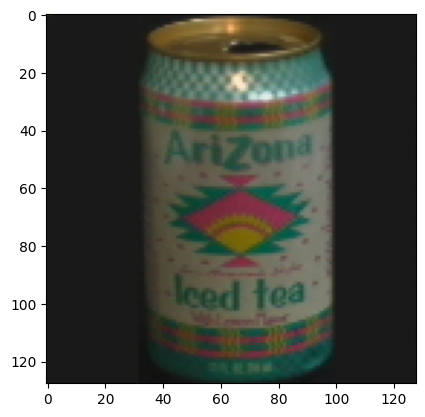

L2
[('object_07_2.png', 0.043), ('object_07_3.png', 0.057), ('object_07_4.png', 0.059), ('object_05_3.png', 0.111), ('object_05_4.png', 0.118)]


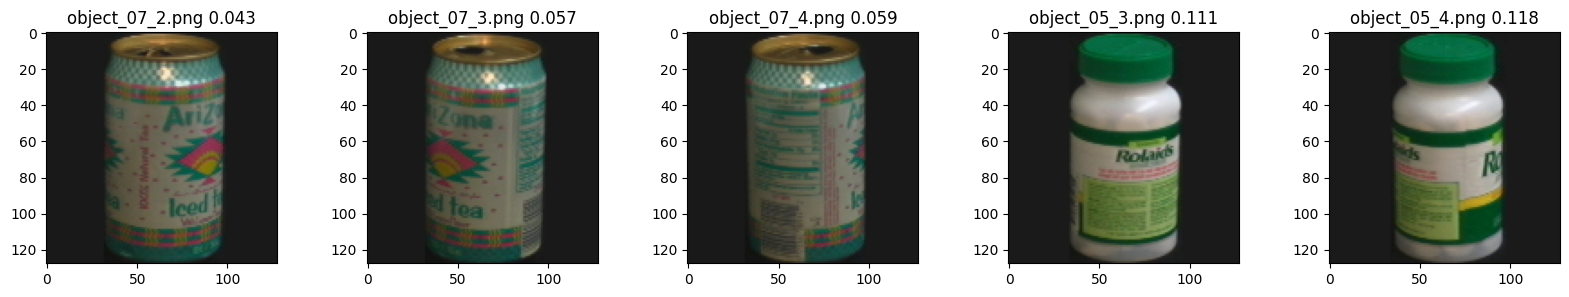

Chi-square
[('object_07_2.png', 0.021), ('object_07_4.png', 0.033), ('object_07_3.png', 0.033), ('object_05_3.png', 0.18), ('object_05_2.png', 0.185)]


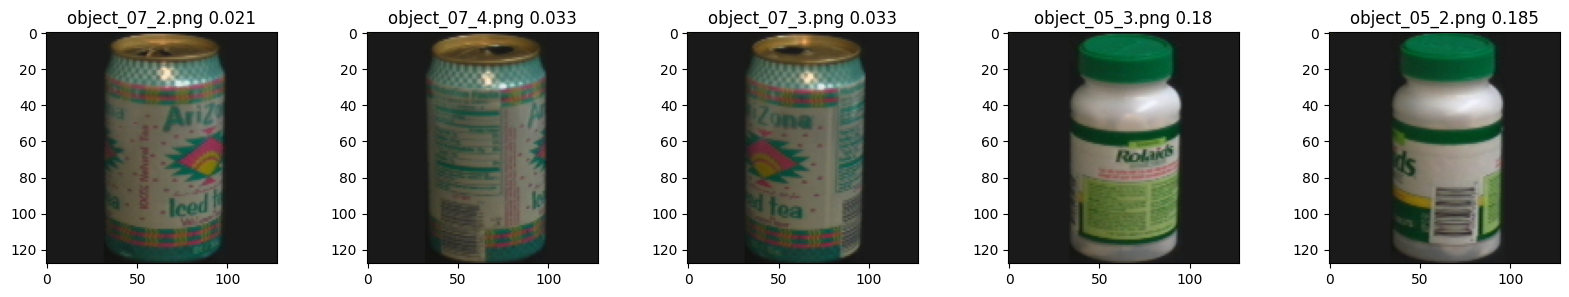

intersection
[('object_07_2.png', 0.069), ('object_07_3.png', 0.091), ('object_07_4.png', 0.102), ('object_05_3.png', 0.273), ('object_05_2.png', 0.276)]


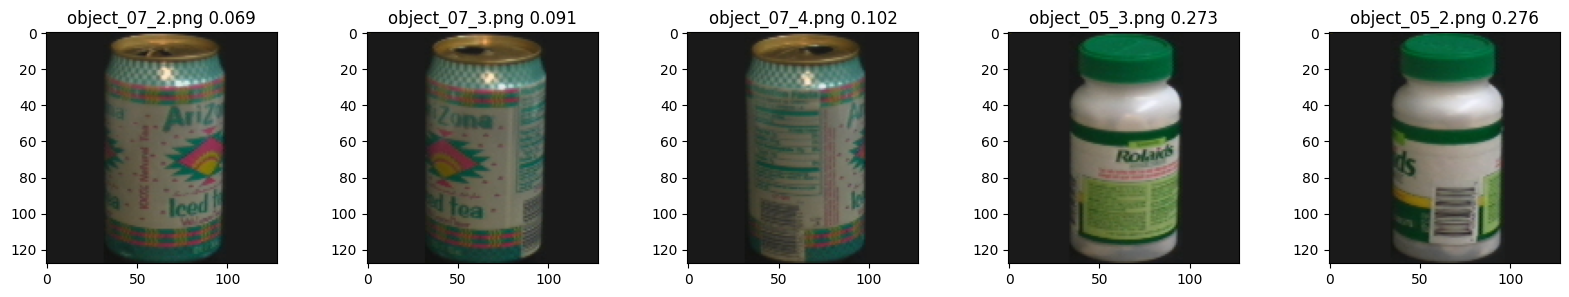

hellinger
[('object_07_2.png', 0.112), ('object_07_3.png', 0.139), ('object_07_4.png', 0.141), ('object_05_2.png', 0.359), ('object_05_1.png', 0.365)]


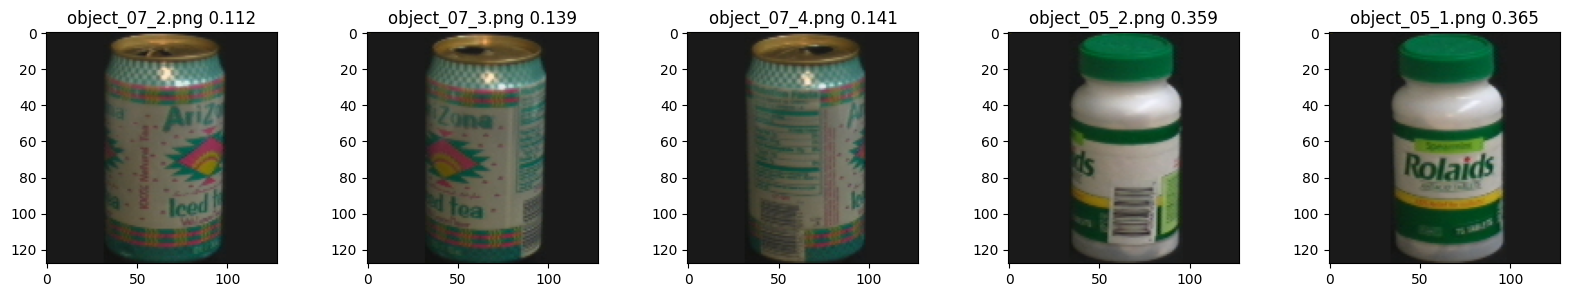

In [89]:
histograms = getHistograms("dataset", 8)

imageName = "object_07_1.png"
image = np.asarray(Image.open("dataset/"+imageName).convert('RGB')).astype(np.float64) / 255
plt.imshow(image)
plt.show()

print("L2")
list1 = getSimilarHist(imageName,histograms,"l2","dataset")
printSimilar(list1, "dataset")

print("Chi-square")
list2 = getSimilarHist(imageName,histograms,"Chi-square","dataset")
printSimilar(list2, "dataset")

print("intersection")
list3 = getSimilarHist(imageName,histograms,"intersection","dataset")
printSimilar(list3, "dataset")

print("hellinger")
list4 = getSimilarHist(imageName,histograms,"hellinger","dataset")
printSimilar(list4, "dataset")


3 e

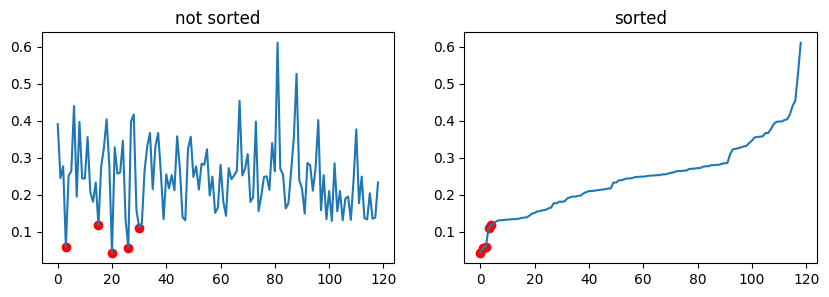

In [112]:
list1 = getSimilarHist(imageName,histograms,"l2","dataset")

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.plot([x[1] for x in list1], label="l2")
plt.title("not sorted")
best5 = np.argsort([x[1] for x in list1])[:5]
for i in best5:
    plt.scatter(i,list1[i][1], color="red")


list1.sort(key=lambda x: x[1])
plt.subplot(1,2,2)
plt.plot([x[1] for x in list1], label="l2 sorted")
plt.title("sorted")
best5 = np.argsort([x[1] for x in list1])[:5]
for i in best5:
    plt.scatter(i,list1[i][1], color="red")

plt.show()

2 f

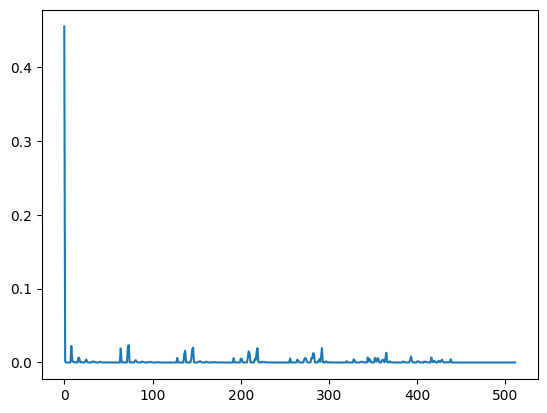

In [115]:

histogramSum = np.zeros(512)
for filename in os.listdir("dataset"):
        if filename.endswith('.png'):
            histogramSum += histograms[filename]

histogramSum /= np.sum(histogramSum)


plt.plot(histogramSum)

#black

In [116]:
def calculateWeights(histogram, lambd):
    weights = np.zeros(512)
    for i in range(0, len(histogram)):
        weights[i] = np.exp(-lambd * histogram[i])
    return weights

In [126]:
def getSimilarHistWeights(image_dir,histograms,metric,directory,weights):
    objects = []

    image =  np.asarray(Image.open(directory + "/"+image_dir).convert('RGB')).astype(np.float64) / 255
    image_histogram = myhist3(image, 8).reshape(-1) * weights
    image_histogram /= np.sum(image_histogram)

    for filename in os.listdir(directory):
        if image_dir == filename:
            continue
        if filename.endswith('.png'):
            histogramToComapre = histograms[filename] * weights
            histogramToComapre /= np.sum(histogramToComapre)
            distance = compare_histograms(image_histogram,histogramToComapre , metric)
            objects.append((filename, distance))
    
    return objects

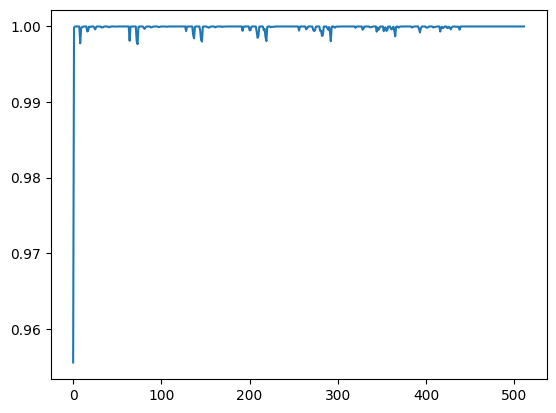

In [136]:
weights = calculateWeights(histogramSum, 0.1)
plt.plot(weights)

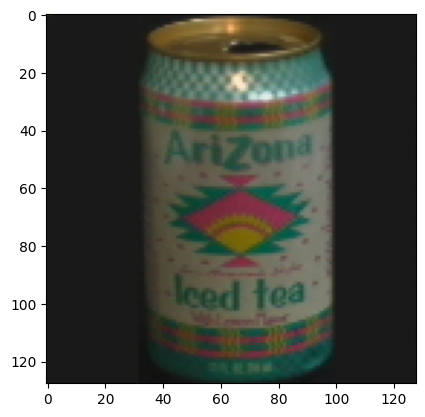

L2
[('object_07_2.png', 0.044), ('object_07_3.png', 0.058), ('object_07_4.png', 0.061), ('object_05_3.png', 0.114), ('object_05_4.png', 0.12)]


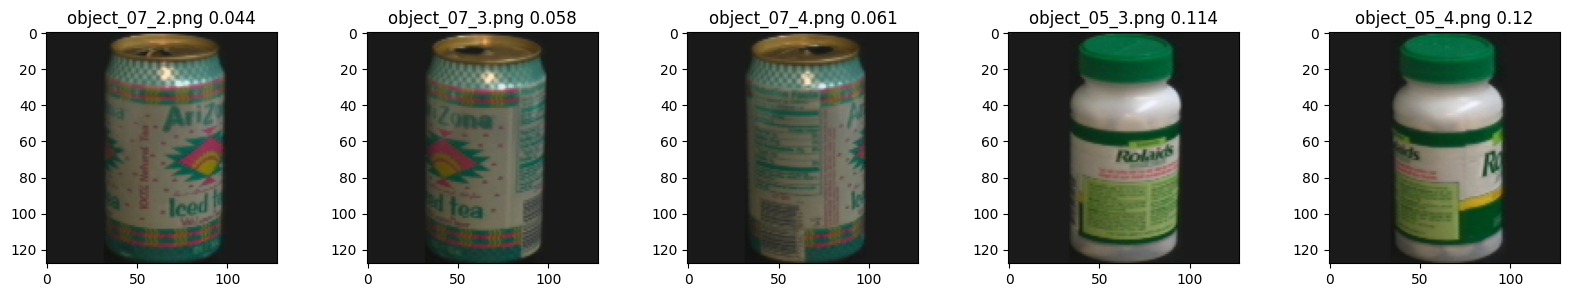

Chi-square
[('object_07_2.png', 0.022), ('object_07_4.png', 0.034), ('object_07_3.png', 0.034), ('object_05_3.png', 0.184), ('object_05_2.png', 0.189)]


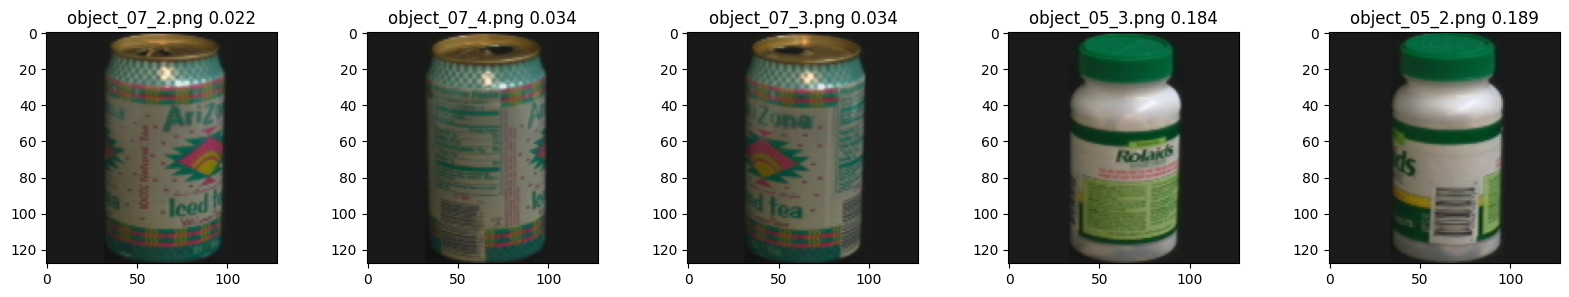

intersection
[('object_07_2.png', 0.071), ('object_07_3.png', 0.093), ('object_07_4.png', 0.104), ('object_05_3.png', 0.279), ('object_05_2.png', 0.282)]


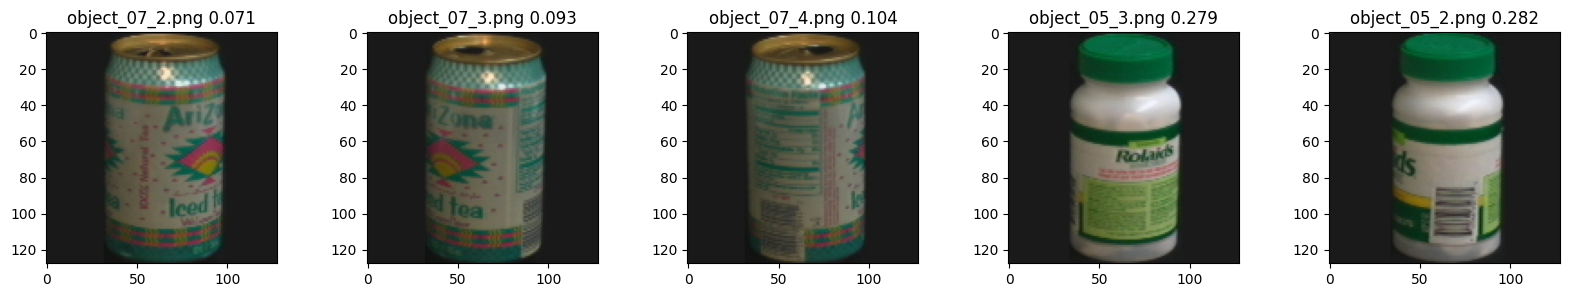

hellinger
[('object_07_2.png', 0.113), ('object_07_3.png', 0.14), ('object_07_4.png', 0.143), ('object_05_2.png', 0.363), ('object_05_1.png', 0.369)]


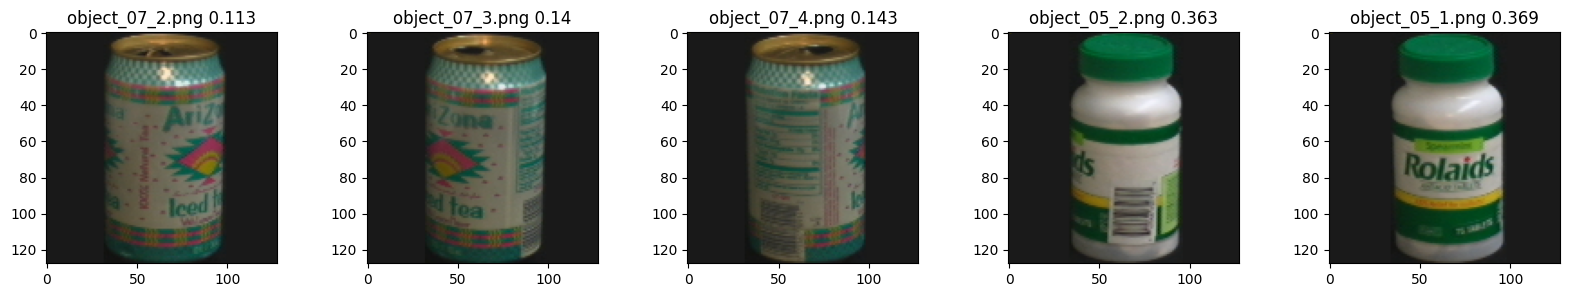

In [137]:
histograms = getHistograms("dataset", 8)

imageName = "object_07_1.png"
image = np.asarray(Image.open("dataset/"+imageName).convert('RGB')).astype(np.float64) / 255
plt.imshow(image)
plt.show()

print("L2")
list1 = getSimilarHistWeights(imageName,histograms,"l2","dataset", weights)
printSimilar(list1, "dataset")

print("Chi-square")
list2 = getSimilarHistWeights(imageName,histograms,"Chi-square","dataset", weights)
printSimilar(list2, "dataset")

print("intersection")
list3 = getSimilarHistWeights(imageName,histograms,"intersection","dataset", weights)
printSimilar(list3, "dataset")

print("hellinger")
list4 = getSimilarHistWeights(imageName,histograms,"hellinger","dataset", weights)
printSimilar(list4, "dataset")